<a href="https://colab.research.google.com/github/falithurrahman/Business-Case-Example/blob/main/Final_Project_Stats_MaulanaF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL PROJECT

#### Becoming familiar with the dataset.

#### The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


_For all visualizations, please include a title in each graph and appropriate labels_

## T4. Generate the following and explain your findings:

1. For the "Median value of owner-occupied homes" provide a boxplot
2. Provide a  histogram for the Charles river variable
3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
5. Create a histogram for the pupil to teacher ratio variable


## Median value of owner-occupied homes

(Median value of owner-occupied homes in $1000's)

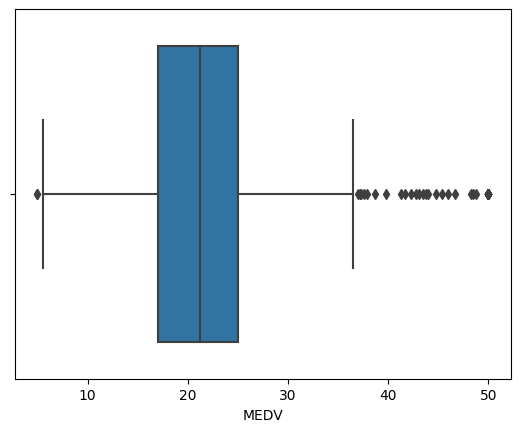

In [4]:
ax = sns.boxplot(x='MEDV', data = boston_df)

## Charles river

(1 if tract bounds river; 0 otherwise) 

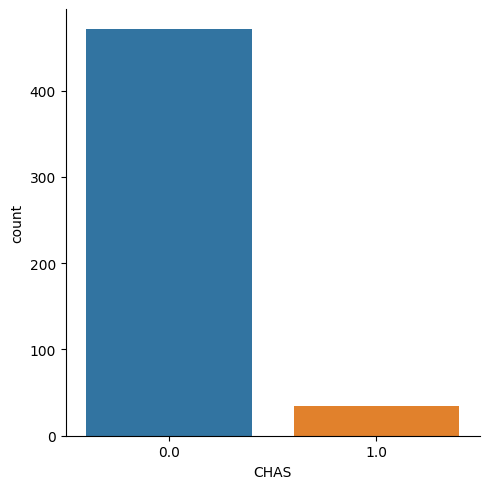

In [5]:
sns.catplot(x='CHAS', kind='count', data = boston_df)

## MEDV variable vs the AGE variable

(The age variable is discretized into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

(Median value of owner-occupied homes in $1000's)

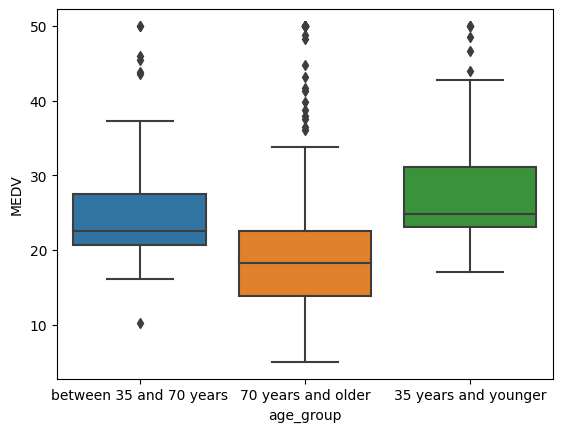

In [6]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)

## Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

(NOX - nitric oxides concentration (parts per 10 million)

(INDUS - proportion of non-retail business acres per town)

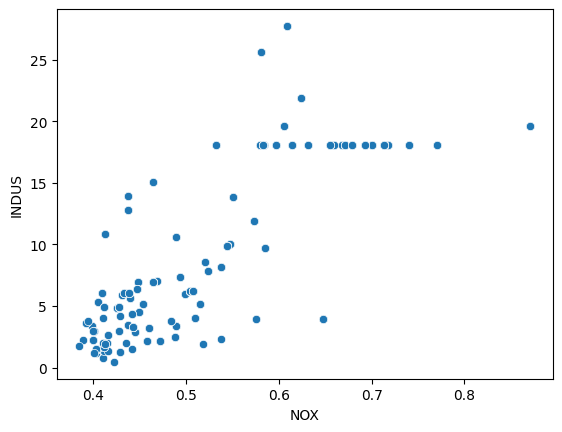

In [7]:
ax = sns.scatterplot(x='NOX', y='INDUS',  data=boston_df)

## Pupil-teacher ratio by town

(PTRATIO - pupil-teacher ratio by town)

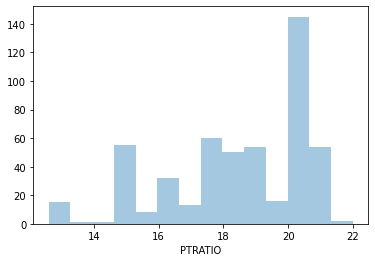

In [ ]:
ax = sns.distplot(boston_df['PTRATIO'], kde = False)

## T5. Use the appropriate tests to answer the questions provided.
_For each of the following questions_

1. Is there a significant difference in median value of houses bounded by the Charles river or not? 
#### (T-test for independent samples)
2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 
#### (ANOVA)
3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
#### (Pearson Correlation)
4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 
#### (Regression analysis)

_Be sure to:_

State your hypothesis.
Use α = 0.05
Perform the test Statistics.
State the conclusion from the test.

## Is there a significant difference in median value of houses bounded by the Charles river or not?

#### Hypothesis:

-   $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by the Charles river")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses bounded by the Charles river")


In [ ]:
import scipy.stats

In [ ]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

(Since the p-value is less than 0.05 we can not assume equality of variance)

In [ ]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than 0.05 we reject the null hypothesis as there is enough proof that there is a statistical difference in Median value of owner-occupied homes based on Charles river variable

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

#### Hypothesis:

-   $H_0: µ_1 = µ_2 = µ_3$ (the three means are equal)
-   $H_1:$ At least one of the means differ

In [ ]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

 (Since the p-value is more than 0.05, the variance are equal)

Now we separate the three samples (one for each age category) into a variable each

In [ ]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

Now, run a one-way ANOVA

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis as there is a significant evidence that at least one of the means differ.


## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

#### Hypothesis:
-   $H_0:$ both does not correlate
-   $H_1:$ both correlate


In [ ]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209154, 7.913361061236894e-98)

**Conclusion:** Since the p-value < 0.05, we reject  the Null hypothesis and conclude that there exists a relationship between  NOX and INDUS.

## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

#### Hypothesis:
-   $H_0:$ Dis is not correlated with MEDV
-   $H_1:$ Dis is correlated with MEDV


In [ ]:


X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.21e-08
Time:                        22:14:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value < 0.05, we reject  the Null hypothesis and conclude that there exists a relationship between  DIS and MEDV.